## More Image Operations - Drawing, Bitwise Operation, Masking and Contours

## DRAWING

What if we wanted to draw a single line? Or a circle?

NumPy does not provide that type of functionality — it’s only a numerical processing library.

Luckily, OpenCV provides convenient, easy-to-use methods to draw shapes on an image. 

## BITWISE OPERATIONS

What happens if our ROI is non-rectangular? What would you do then?

A combination of bitwise operations and masking can help us extract non-rectangular ROIs from image with ease.

Bitwise operations operate in a binary manner and are represented as grayscale images. 

A given pixel is turned “off” if it has a value of zero and it is turned “on” if the pixel has a value greater than zero.

## MASKING

A combination of both bitwise operations and masks are used to construct ROIs that are non-rectangular.

This allows us to extract regions from images that are of completely arbitrary shape.

A mask allows us to focus only on the portions of the image that interests us.

## CONTOURS

We have the outlines and structures of the objects in images, the big question is: How do we find and access these outlines?

The answer is contours.

### FINDING AND DRAWING CONTOURS

Contours are simply the outlines of an object in an image.

If the image is simple enough, we might be able to get away with using the grayscale image as an input.

But for more complicated images, we must first find the object by using methods such as edge detection or thresholding — we are simply seeking a binary image where white pixels correspond to objects in an image and black pixels as the background. There are many ways to obtain a binary image like this, but the most used methods are edge detection and thresholding.

For better accuracy you’ll normally want to utilize a binary image rather than a grayscale image.

Once we have this binary or grayscale image, we need to find the outlines of the objects in the image.

This is actually a lot easier than it sounds thanks to the cv2.findContours function.

In [1]:
# import necessary packages
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

In [2]:
# initialize our canvas as a 300x300 with 3 channels, RGB with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")

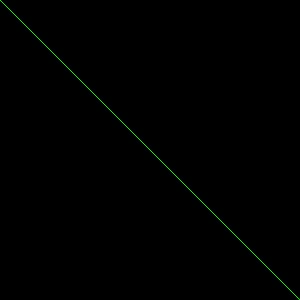

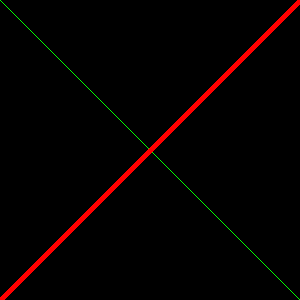

In [3]:
# draw a green line from the top-left corner of our canvas to the bottom-right
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
cv2_imshow(canvas)
print("\n")

# draw a 3 pixel thick red line from the top-right corner to the bottom-left
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
cv2_imshow(canvas)
print("\n")

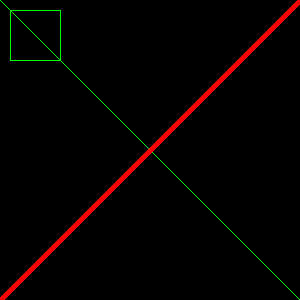

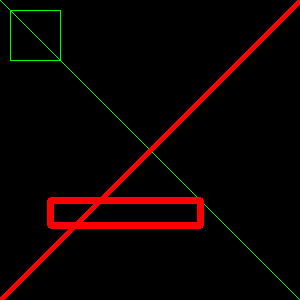

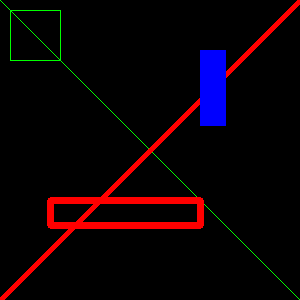

In [4]:
# draw a green 50x50 pixel square, starting at 10x10 (w x h) and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)
cv2_imshow(canvas)
print("\n")

# draw another rectangle, this time we'll make it red and 5 pixels thick
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
cv2_imshow(canvas)
print("\n")

# let's draw one last rectangle: blue and filled in by specifying -1 as the thickness
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
cv2_imshow(canvas)
print("\n")

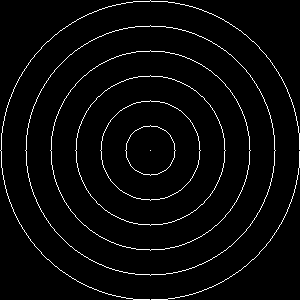

In [5]:
# reset our canvas and draw a white circle at the center of the canvas with
# increasing radii - from 25 pixels to 150 pixels
# loop over a number of radius values, starting from 0 and ending at 150, incrementing by
# 25 at each step.
# the xrange function is exclusive; therefore, we specify a stopping value of 175 rather than
# 150. the output of xrange function stops at 150 and does not include 175.
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] / 2, canvas.shape[0] / 2)
white = (255, 255, 255)
for r in range(0, 175, 25):
   cv2.circle(canvas, (int(centerX), int(centerY)), r, white)

# show our work of art
cv2_imshow(canvas)
print("\n")

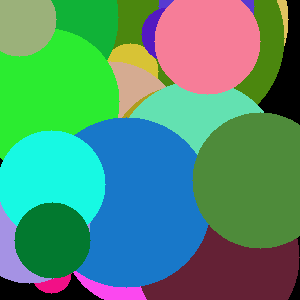

In [7]:
# draw 25 random circles
# In order to draw a random circle, we need to generate three values: the radius of the circle, 
# the color of the circle, and the pt (the (x, y) coordinate) of where the circle will be drawn.
canvas = np.zeros((300, 300, 3), dtype="uint8")
for i in range(0, 25):
	# randomly generate a radius size between 5 and 100, generate a random
	# color, and then pick a random point on our canvas where the circle will be drawn
	radius = np.random.randint(5, high=100)
	color = np.random.randint(0, high=256, size = (3,)).tolist()
	pt = np.random.randint(0, high=300, size = (2,))
	# draw our random circle
	cv2.circle(canvas, tuple(pt), radius, color, -1)

# Show our masterpiece
cv2_imshow(canvas)

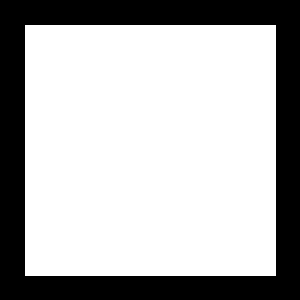

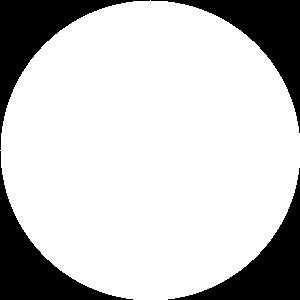

In [8]:
# first, let's draw a rectangle
# initialize our rectangle image as a 300 x 300 NumPy array
# then draw a 250 x 250 white rectangle at the center of the image. -1 thickness (completely filled)
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2_imshow(rectangle)
print("\n")

# secondly, let's draw a circle, centered at the center of the image, with a radius of 150 pixels
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
cv2_imshow(circle)
print("\n")


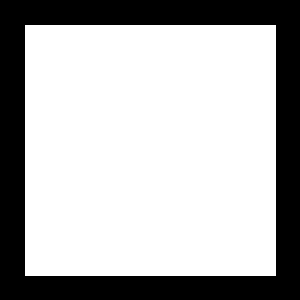

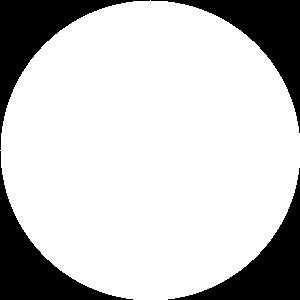

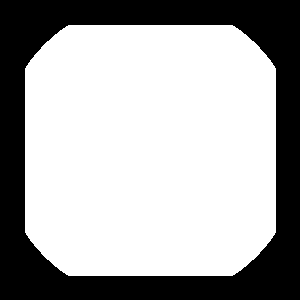

In [9]:
# A bitwise 'AND' is only True when both rectangle and circle have a value that is 'ON.' 
# Simply put, the bitwise AND function examines every pixel in rectangle and circle. 
# If both pixels have a value greater than zero, that pixel is turned 'ON' (i.e set to 255 in the 
# output image). If both pixels are not greater than zero, then the output pixel is left 'OFF' with a 
# value of 0.
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2_imshow(rectangle)
print("\n")
cv2_imshow(circle)
print("\n")
cv2_imshow(bitwiseAnd)

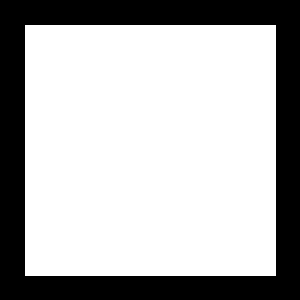

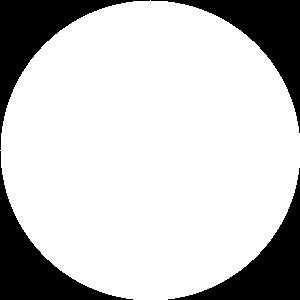

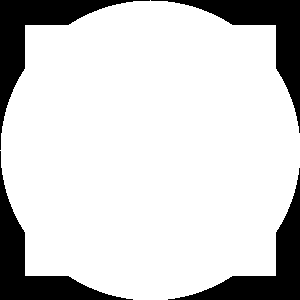

In [10]:
# A bitwise 'OR' examines every pixel in rectangle and circle. If EITHER pixel in rectangle or 
# circle is greater than zero, then the output pixel has a value of 255, otherwise it is 0.
bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2_imshow(rectangle)
print("\n")
cv2_imshow(circle)
print("\n")
cv2_imshow(bitwiseOr)

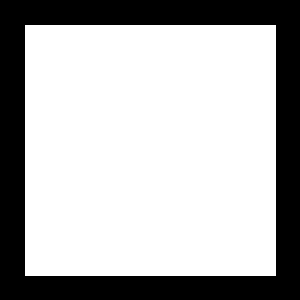

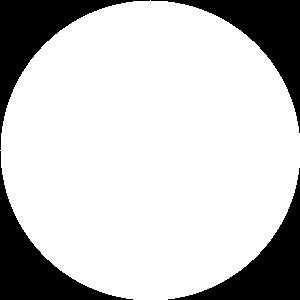

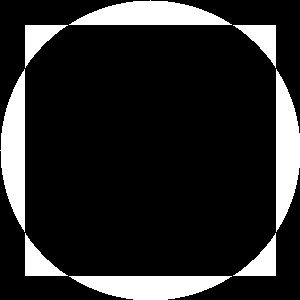

In [11]:
# The bitwise 'XOR' is identical to the 'OR' function, with one exception: both rectangle and 
# circle are not allowed to BOTH have values greater than 0.
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
cv2_imshow(rectangle)
print("\n")
cv2_imshow(circle)
print("\n")
cv2_imshow(bitwiseXor)

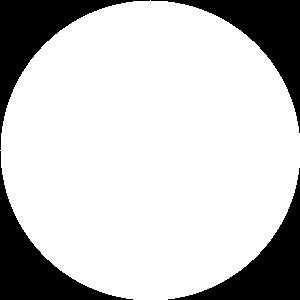

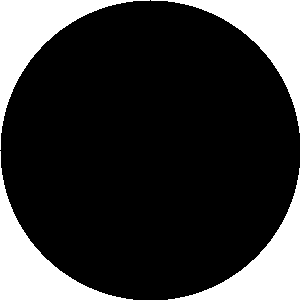

In [12]:
# Finally, the bitwise 'NOT' inverts the values of the pixels. Pixels with a value of 255 become 0, 
# and pixels with a value of 0 become 255.
bitwiseNot = cv2.bitwise_not(circle)
cv2_imshow(circle)
print("\n")
cv2_imshow(bitwiseNot)

In [13]:
from google.colab import files
uploaded = files.upload()

Saving apj.jpg to apj.jpg


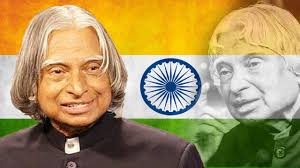

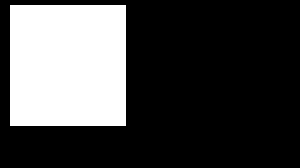

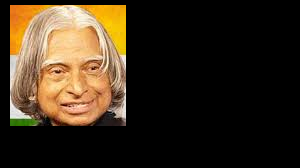

In [15]:
# load the image and display it
image = cv2.imread("apj.jpg")
cv2_imshow(image)
print("\n")

# Masking allows us to focus only on parts of an image that interest us.  A mask is the same 
# size as our image, but has only two pixel values, 0 and 255.  Pixels with a value of 0 are 
# ignored in the original image, and mask pixels with a value of 255 are allowed to be kept. For 
# example, let's construct a rectangular mask that displays only the person in the image
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (10, 5), (125, 125), 255, -1)
cv2_imshow(mask)
print("\n")

# Apply our mask -- notice how only the person in the image is cropped out
# The first two parameters are the image itself. Obviously, the AND function will be True for all
# pixels in the image; however, the important part of this function is the mask keyword 
# argument. By supplying a mask, the cv2.bitwise_and function only examines pixels that are 
# “on” in the mask. In this case, only pixels that are part of the white rectangle.
masked = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(masked)

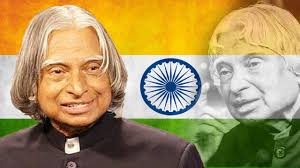

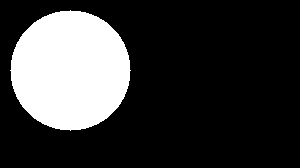

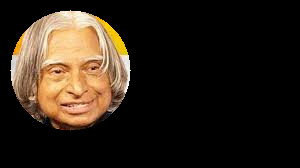

In [16]:
# Now, let's make a circular mask with a radius of 100 pixels and apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (70, 70), 60, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(image)
print("\n")

cv2_imshow(mask)
print("\n")

cv2_imshow(masked)

In [17]:
uploaded1 = files.upload()

Saving basic_shapes.png to basic_shapes.png


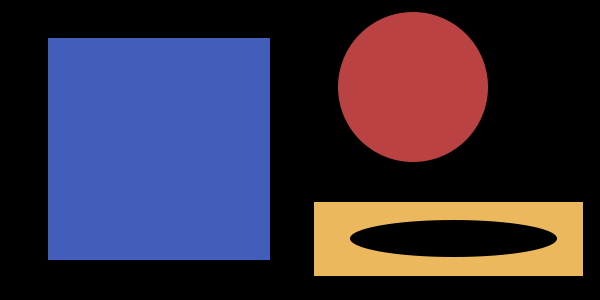

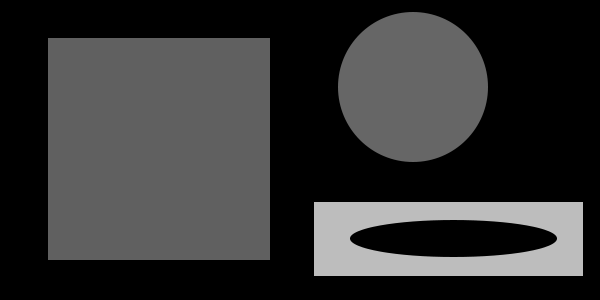

In [18]:
# load the image and convert it to grayscale
image1 = cv2.imread("basic_shapes.png")
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# show the original image
cv2_imshow(image1)
print("\n")

cv2_imshow(gray)

Found 4 contours


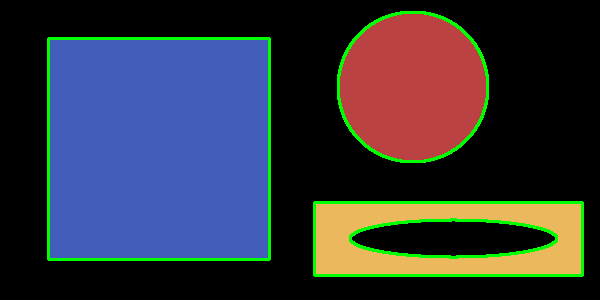

In [19]:
# find all contours in the image and draw ALL contours on the image
#The cv2.findContours function is destructive to the input image (meaning that it manipulates it) 
# so if you intend on using your input image again, be sure to clone it using the copy() method 
# prior to passing it into cv2.findContours.
# We’ll instruct cv2.findContours to return a list of all contours in the image by passing in the 
# cv2.RETR_LIST flag. 
# This flag will ensure that all contours are returned. Other methods exist, such as returning only 
# the external most contours, which we’ll explore later.
# Finally, we pass in the cv2.CHAIN_APPROX_SIMPLE flag. If we did not specify this flag and 
# instead used cv2.CHAIN_APPROX_NONE, we would be storing every single (x, y)-coordinate 
# along the contour. In general, this not advisable. It’s substantially slower and takes up 
# significantly more memory. By compressing our horizontal, vertical, and diagonal segments 
# into only end-points we are able to reduce memory consumption significantly without any 
# substantial loss in contour accuracy.
# Finally, the cv2.findContours function returns a tuple of 2 values. 
# The first value is the contours themselves. These contours are simply the boundary points of 
# the outline along the object.
# The second value is the hierarchy of the contours, which contains information on the topology 
# of the contours. Often we are only interested in the contours themselves and not their actual 
# hierarchy (i.e. one contour being contained in another) so this second value is usually ignored. 
# We then draw our found contours. The first argument we pass in is the image we want to draw 
# the contours on. The second parameter is our list of contours we found using the 
# cv2.findContours function.
# The third parameter is the index of the contour inside the cnts list that we want to draw. 
# If we wanted to draw only the first contour, we could pass in a value of 0. If we wanted to draw 
# only the second contour, we would supply a value of 1. Passing in a value of -1 for this 
# argument instructs the cv2.drawContours function to draw all contours in the list. 
# Finally, the last two arguments to the cv2.drawContours function is the color of the contour 
# (green), and the thickness of the contour line (2 pixels).
(cnts,  _) = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
clone = image1.copy()
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)
print ("Found {} contours".format(len(cnts)))

# show the output image
cv2_imshow(clone)

Drawing contour #1


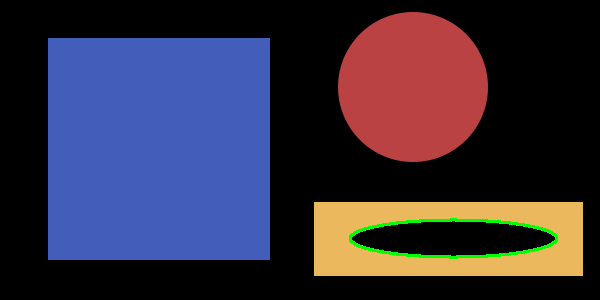



Drawing contour #2


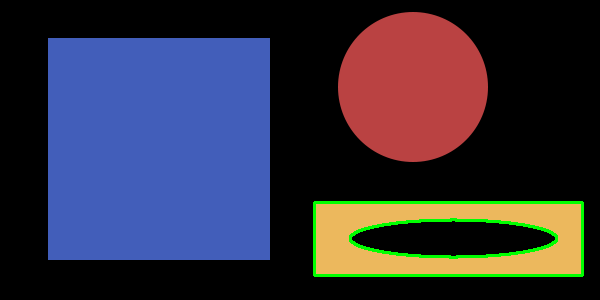



Drawing contour #3


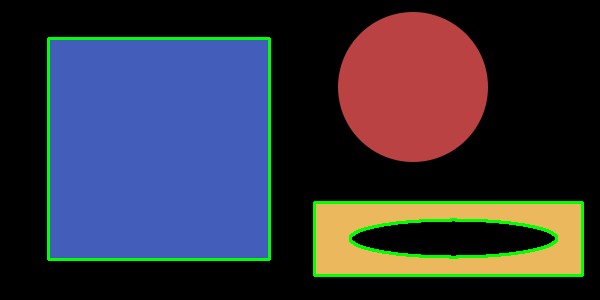



Drawing contour #4


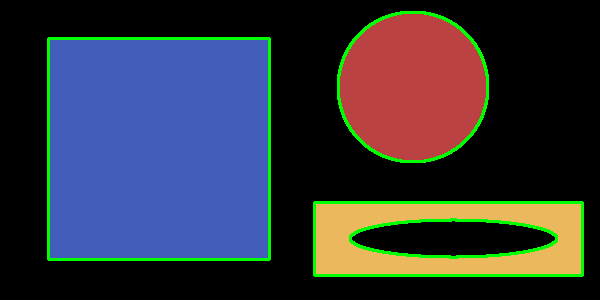

In [20]:
# it’s important to explore how to access each individual contour
# re-clone the image and close all open windows
clone = image1.copy()

# loop over the contours individually and draw each of them
# By using the built-in Python enumerate function we are also able to get the index of each 
# contour along with the contour itself.
# Notice that, a value of -1 for contour index value (indicating that I want to draw all contours) 
# and then wrapping the contour c as a list.
# In general, if you want to draw only a single contour, I would get in the habit of always 
# supplying a value of -1 for contour index and then wrapping your single contour c as a list.
for (i, c) in enumerate(cnts):
	print ("Drawing contour #{}".format(i + 1))
	cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
	cv2_imshow(clone)
	print("\n")

Found 3 EXTERNAL contours


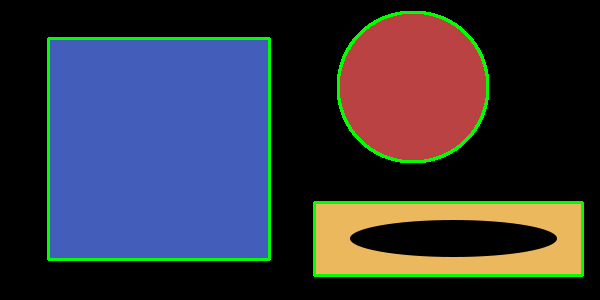

In [21]:
# find only external contours and ignore the ovular region inside the orange rectangle.
# re-clone the image and close all open windows
clone = image1.copy()

# find contours in the image, but this time, keep only the EXTERNAL contours in the image.
# Specifying cv2.RETR_EXTERNAL flag instructs OpenCV to return only the external most 
# contours of each shape in the image, meaning that if one shape is enclosed in another, then 
# the contour is ignored.
(cnts, _) = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)
print ("Found {} EXTERNAL contours".format(len(cnts)))

# show the output image
cv2_imshow(clone)

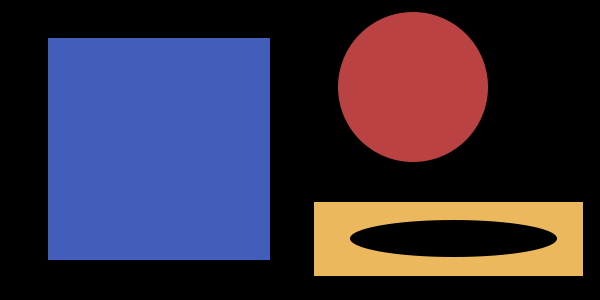

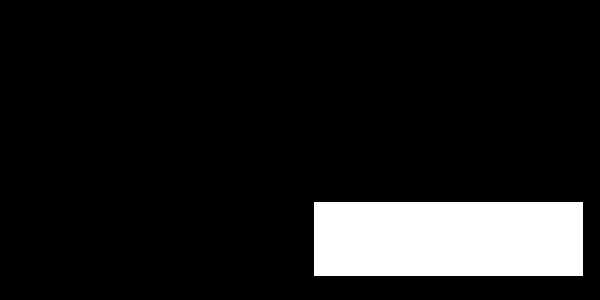

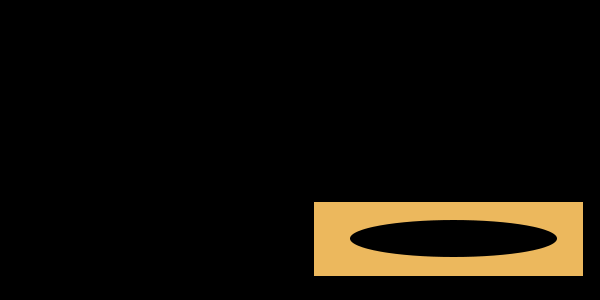

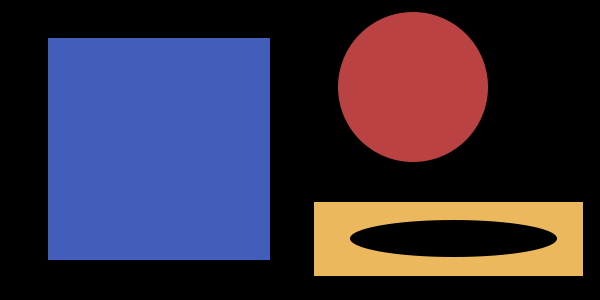

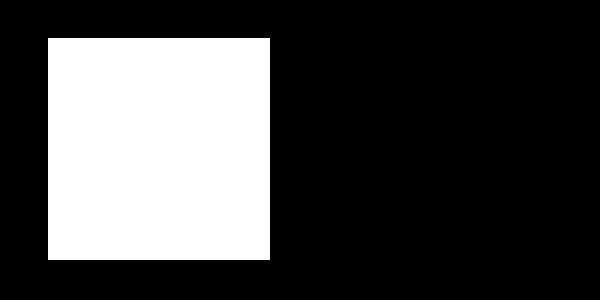

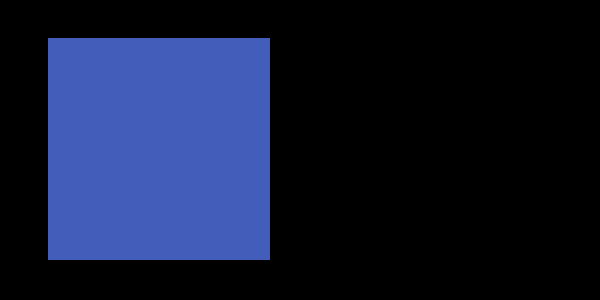

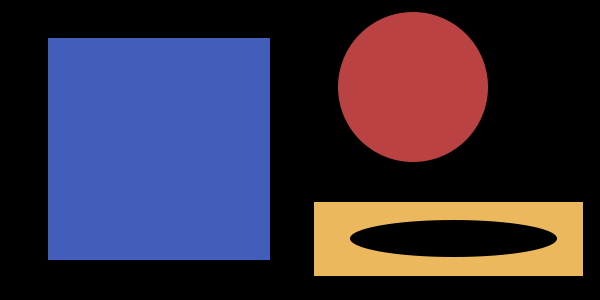

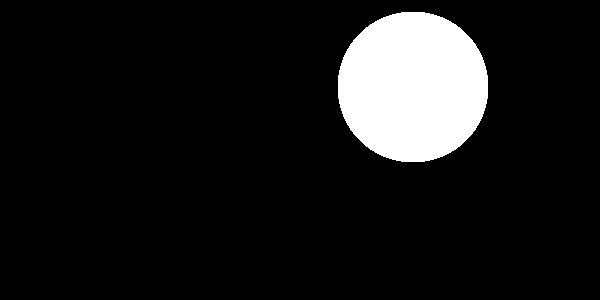

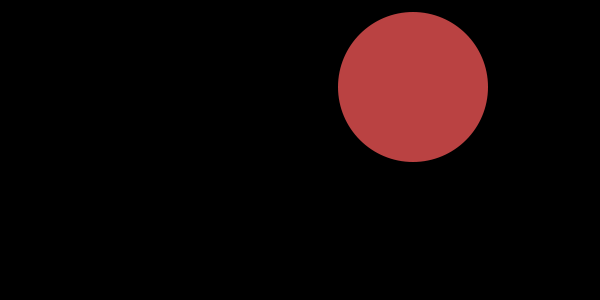

In [22]:
# using both contours and masks together.
# what if we wanted to access just the blue rectangle and ignore all other shapes? 
# How would we do that?
# The answer is that we loop over the contours individually, draw a mask for the contour, and 
# then apply a bitwise AND.
# re-clone the image and close all open windows
clone = image1.copy()

# loop over the contours individually
for c in cnts:
	# construct a mask by drawing only the current contour
	# create an empty NumPy array with the same dimensions of our original image. 
	# empty NumPy array will serve as the mask for the current shape that to be examined 
	# draw the contour on the mask. Notice how I only supplied a value of 255 (white) for the 
    # color here — but isn’t this incorrect? Isn’t white represented as (255, 255, 255)?
	# White is represented by (255, 255, 255), but only if we are working with a RGB image.
	# In this case we are working with a mask that has only a single (grayscale) channel
    # thus only need to supply a value of 255 to get white.
	mask = np.zeros(gray.shape, dtype="uint8")
	cv2.drawContours(mask, [c], -1, 255, -1)

	# show the images
	# A bitwise AND is true only if both input pixels are greater than zero.
	cv2_imshow(image1)
	print("\n")
	cv2_imshow(mask)
	print("\n")
	cv2_imshow(cv2.bitwise_and(image1, image1, mask=mask))
	print("\n")
	print("\n")
	print("\n")